In [1]:
# import pyDOE
# pyDOE.__file__

In [2]:
import pandas as pd

import dexpy as dx
des_1 = dx.Design(experiments=5, levels={0: [-1, 0, 1], 1: [-5, 5]})
des_1.set_model(order=2, interactions_only=False, bias=True)
des_1.set_algorithm(criterion="det", epochs=100)
des_1.__dict__

{'experiments': 5,
 'levels': {0: [-1, 0, 1], 1: [-5, 5]},
 'features': 2,
 'order': 2,
 'interactions_only': False,
 'bias': True,
 'epochs': 100,
 'criterion': 'det'}

In [5]:
model, design, design_hist, optimality_hist = des_1.fit()
model

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,-5.0,0.0,-0.0,25.0
1,1.0,1.0,5.0,1.0,5.0,25.0
2,1.0,-1.0,5.0,1.0,-5.0,25.0
3,1.0,-1.0,5.0,1.0,-5.0,25.0
4,1.0,1.0,-5.0,1.0,-5.0,25.0


In [9]:
design

,x0,x1
0,0.0,-5.0
1,1.0,5.0
2,-1.0,5.0
3,-1.0,5.0
4,1.0,-5.0


In [10]:
design_hist

,x0,x1,epoch
0,0.0,-5.0,99
1,1.0,5.0,99
2,-1.0,5.0,99
3,-1.0,5.0,99
4,1.0,-5.0,99


In [6]:
optimality_hist

,0,1,2,3,4,max,epoch
0,0,0,1.090955e-19,4.816059e-21,8.754311e-21,1.090955e-19,99
1,0,1,-1.059577e-14,-1.549137e-15,NaN,-1.549137e-15,99
2,1,0,-4.528347e-13,-6.930567e-15,-7.558568e-16,-7.558568e-16,99
3,1,1,8.324538e-13,1.614954e-13,NaN,8.324538e-13,99
4,2,0,6.976476e-13,4.948836e-13,3.159305e-12,3.159305e-12,99
...,...,...,...,...,...,...,...
995,2,1,-1.792023e-11,1.115208e-11,NaN,1.115208e-11,99
996,3,0,4.111511e-09,1.407545e-10,3.255690e-09,4.111511e-09,99
997,3,1,-6.940104e-09,-1.120409e-24,NaN,-1.120409e-24,99
998,4,0,-2.426806e-25,6.572801e-25,1.516754e-24,1.516754e-24,99


---

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def polynomial(data, degrees):
    copy = data.copy()
    polynomials = np.ones((data.shape[0],1))
    for i in range(data.shape[1]):
        for j in range(2, degrees+1):
            polynomials = np.append(polynomials, (copy[:,i]**j).reshape((len(data),1)), axis=1)
            df = np.append(data.reshape((len(data),2)), polynomials[:,1:], axis=1)
    return df

In [57]:
ll = pd.DataFrame(np.linspace(-10,10))
ll.shape

(50, 1)

In [58]:
polynomial(data=ll, degrees=2)

KeyError: (slice(None, None, None), 0)

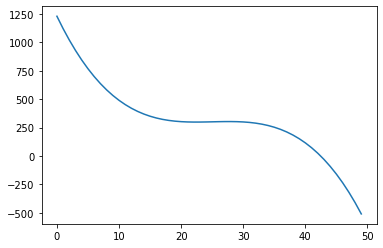

In [48]:
x = np.linspace(-10,10)
basis = np.array([x**0, x**1, x**2, x**3]).T
coefs = np.array([[100,100,100],
                 [1,1,1],
                 [.2,.2,.2],
                  [-.3,-.3,-.3]])
decomp = (basis @ coefs).sum(axis=1)
plt.plot(decomp)

##### Basis Functions
- Step
- Polynomial
- Splines

- ReLU
- Leaky ReLU
- ELU
- SELU
- Maxout

- Swish
- Sigmoid
- Tanh

- Radial